In [2]:
%load_ext lab_black
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from glob import glob
import IPython.display as ipd
from itertools import cycle
from typing import TYPE_CHECKING
from tqdm.auto import tqdm

if TYPE_CHECKING:
    plt.rcParams = {}
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])
sns.set_theme(style="white", palette=None)

In [3]:
train = pd.read_pickle("../dataset/train.pkl")
test = pd.read_pickle("../dataset/test.pkl")

In [5]:
features = [f"f_{i:02d}" for i in range(31)]
train.columns

Index(['id', 'f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07',
       'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16',
       'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25',
       'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'target'],
      dtype='object')

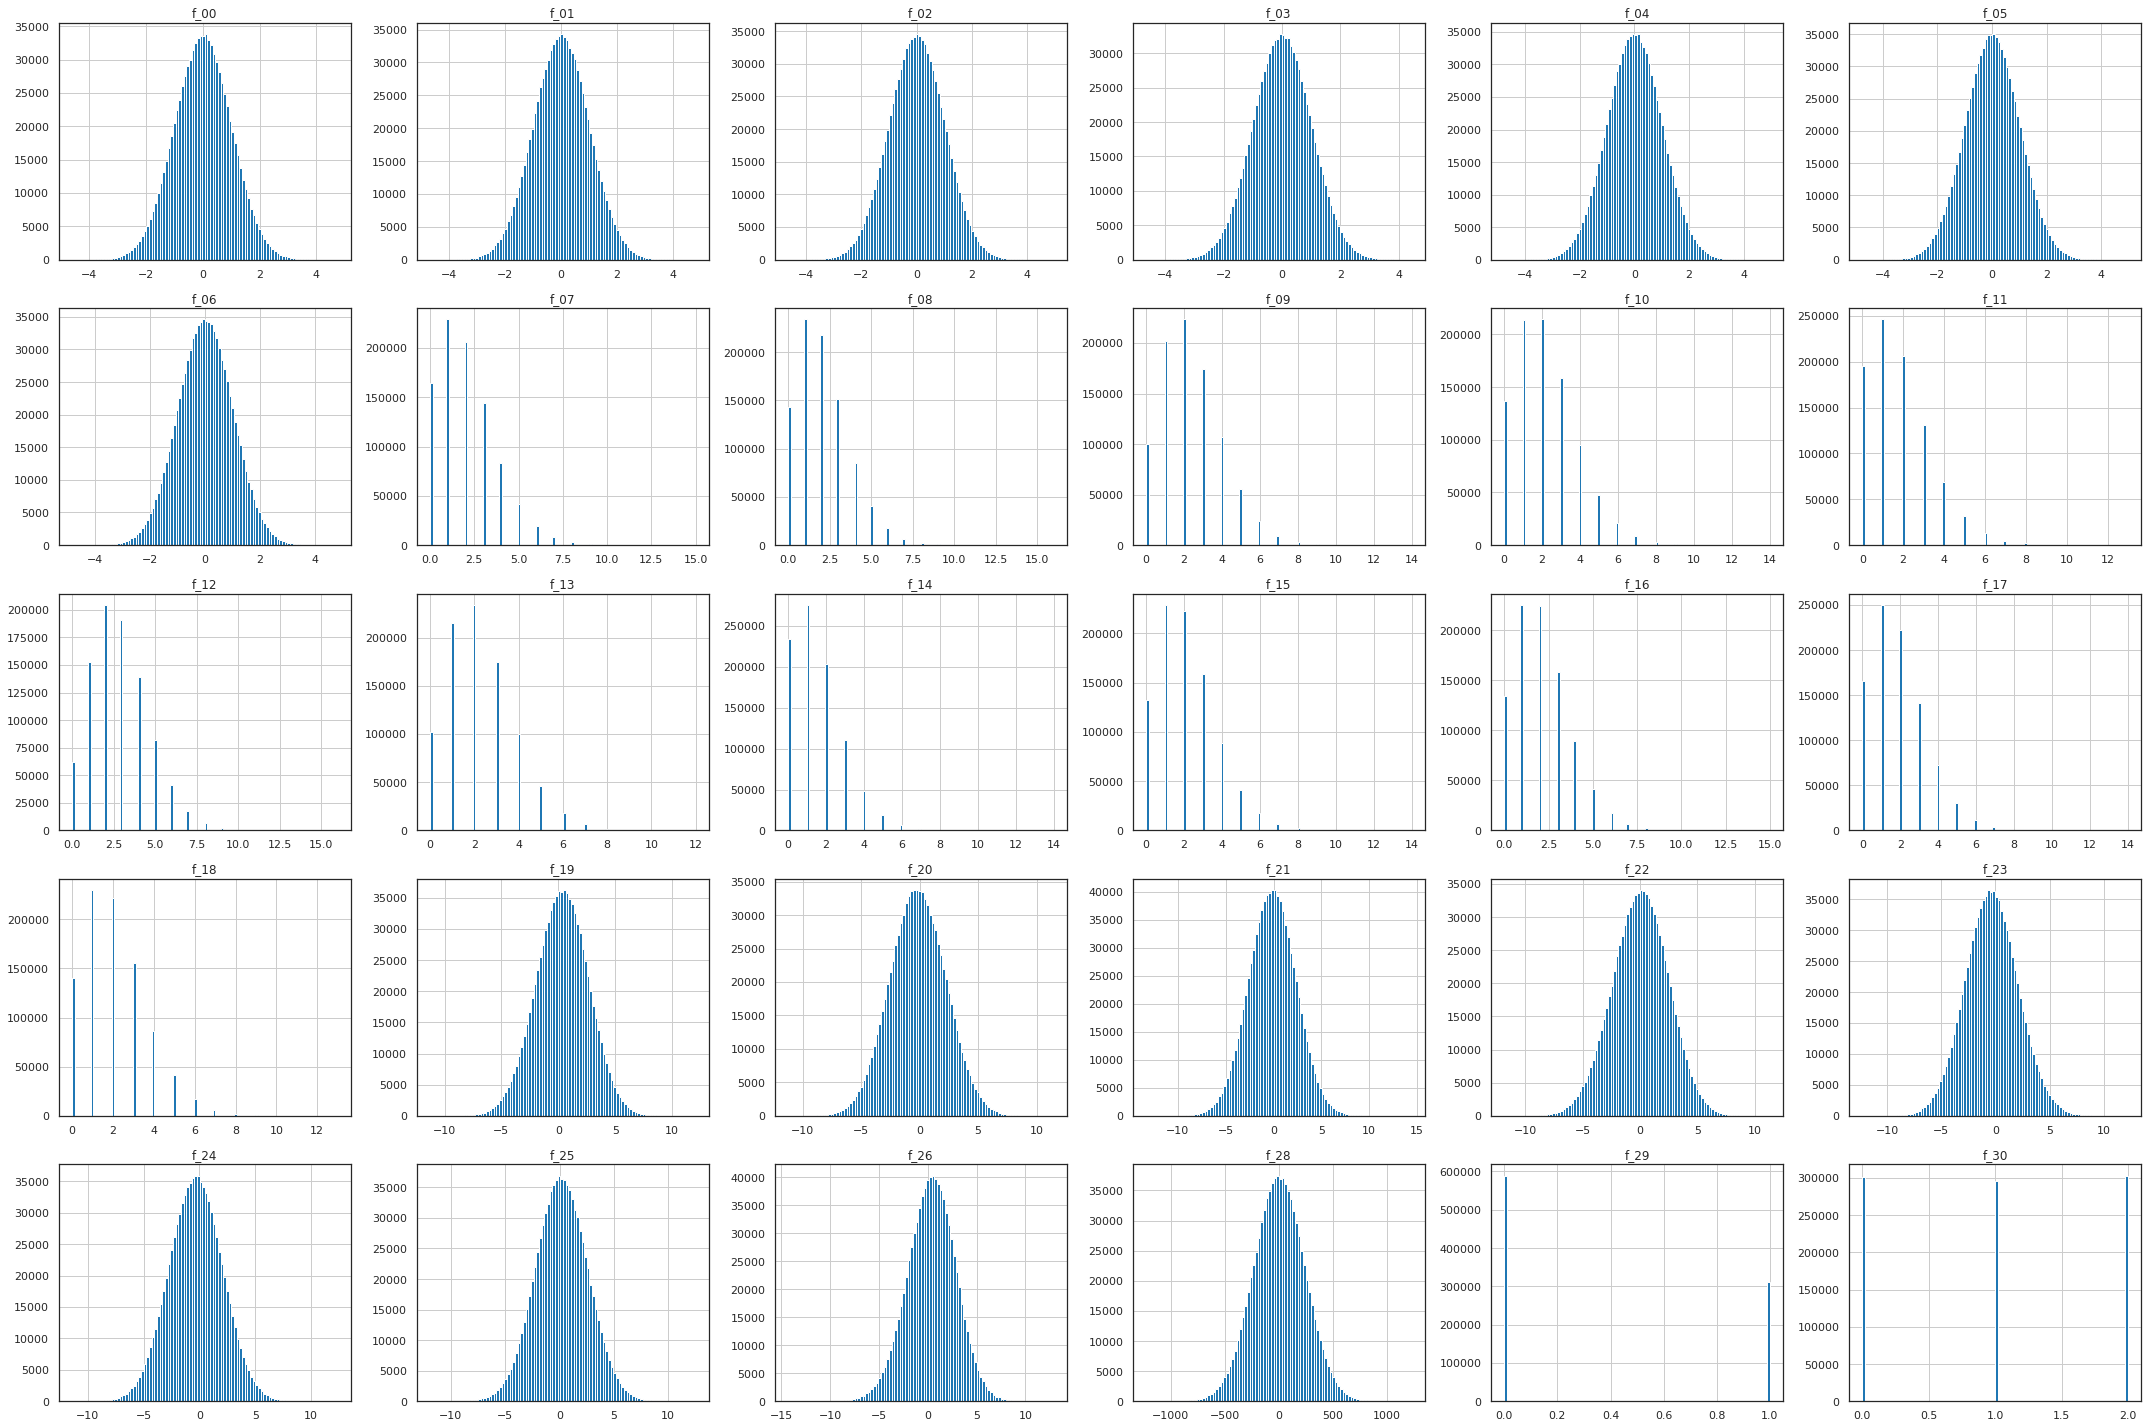

In [8]:
plt.subplots(5, 6, figsize=(30, 20))
for i in range(31):
    if i == 27:
        continue
    plt.subplot(5, 6, i + 1 if i < 27 else i)
    train[features[i]].hist(bins=100)
    plt.title(features[i])
    # plt.show()
plt.tight_layout()

In [27]:
train[features + ["target"]]

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,1.380145,-0.038884,0.597111,0.854560,0.684301,-1.058618,1.310699,2,1,2,...,-1.594744,0.522019,0.833047,2.714125,1.290094,BABBCBBBED,455.033851,0,2,1
899996,-1.369789,0.044841,0.015458,0.376565,-0.380529,-0.830815,-1.798458,4,1,2,...,2.413899,-0.674942,-0.412111,-0.030436,-3.144047,BBBGBBDQBE,134.703577,0,1,0
899997,1.386201,-0.961150,0.725994,-0.132844,0.873911,-0.245339,-1.045786,0,0,6,...,-0.151930,-4.560773,-1.249154,1.793535,2.253696,AEBEDBBHBA,-99.536313,0,1,0
899998,-1.590572,-0.509938,-1.715397,-0.249988,1.359933,1.650808,-0.058592,0,2,2,...,2.423670,2.110008,0.561271,-2.149610,1.019982,ADBAAADDAE,47.823039,1,2,0


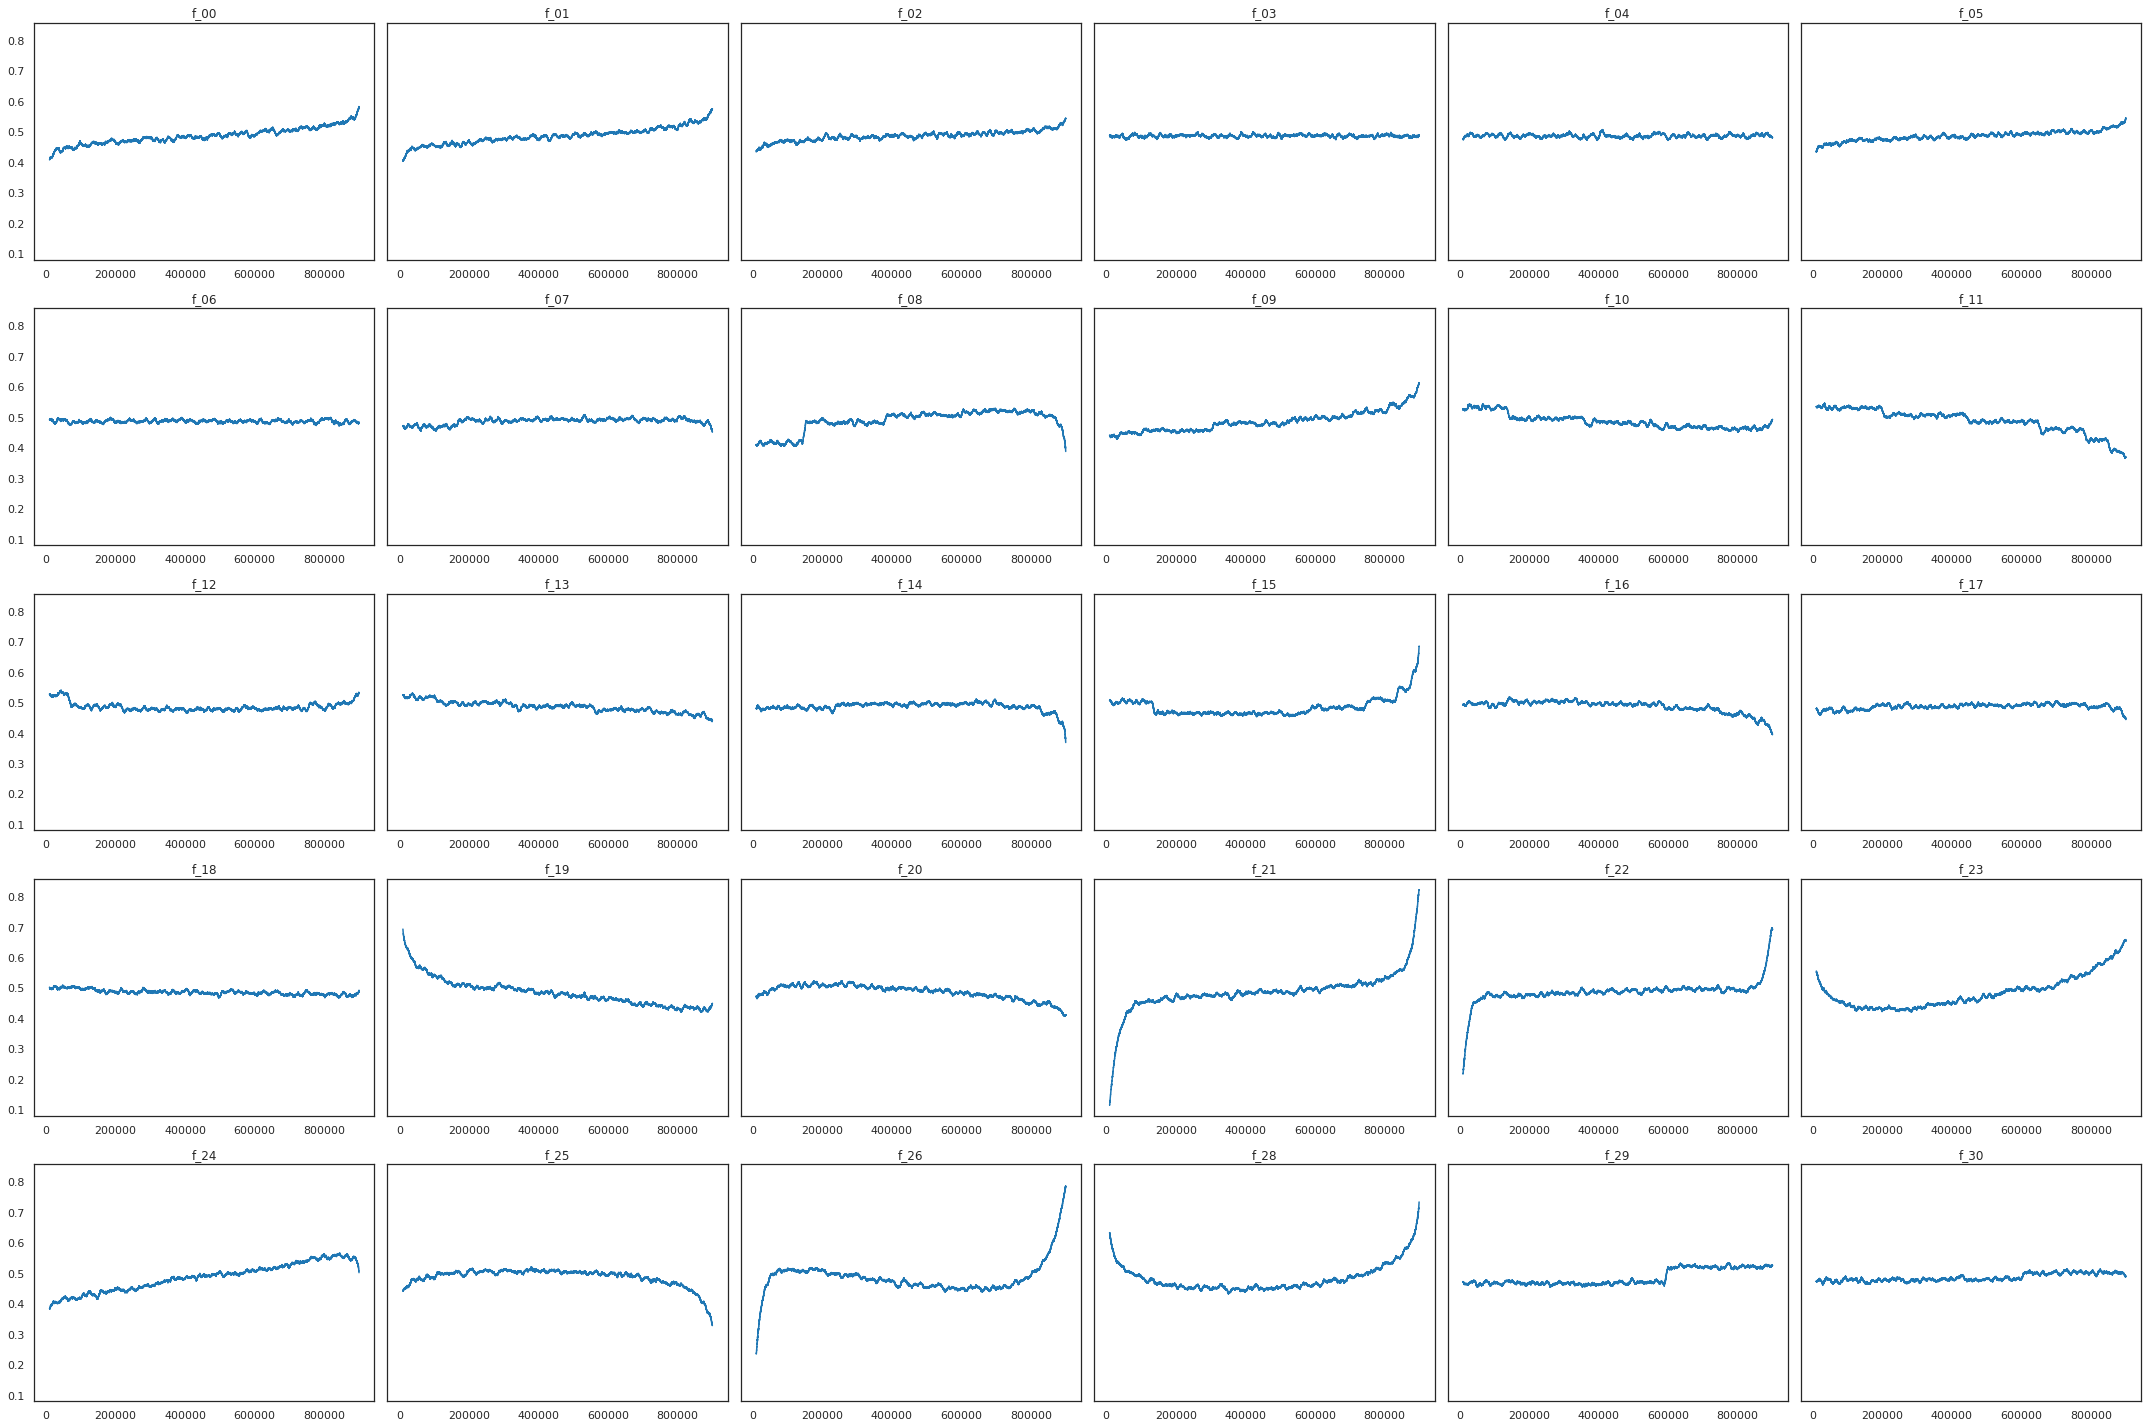

In [49]:
plt.subplots(5, 6, figsize=(30, 20), sharey=True)
for i in range(31):
    if i == 27:
        continue
    plt.subplot(5, 6, i + 1 if i < 27 else i)

    t = train.sort_values(features[i]).target
    t.reset_index(drop=True).rolling(10000).mean().plot()
    plt.title(features[i])
plt.tight_layout()

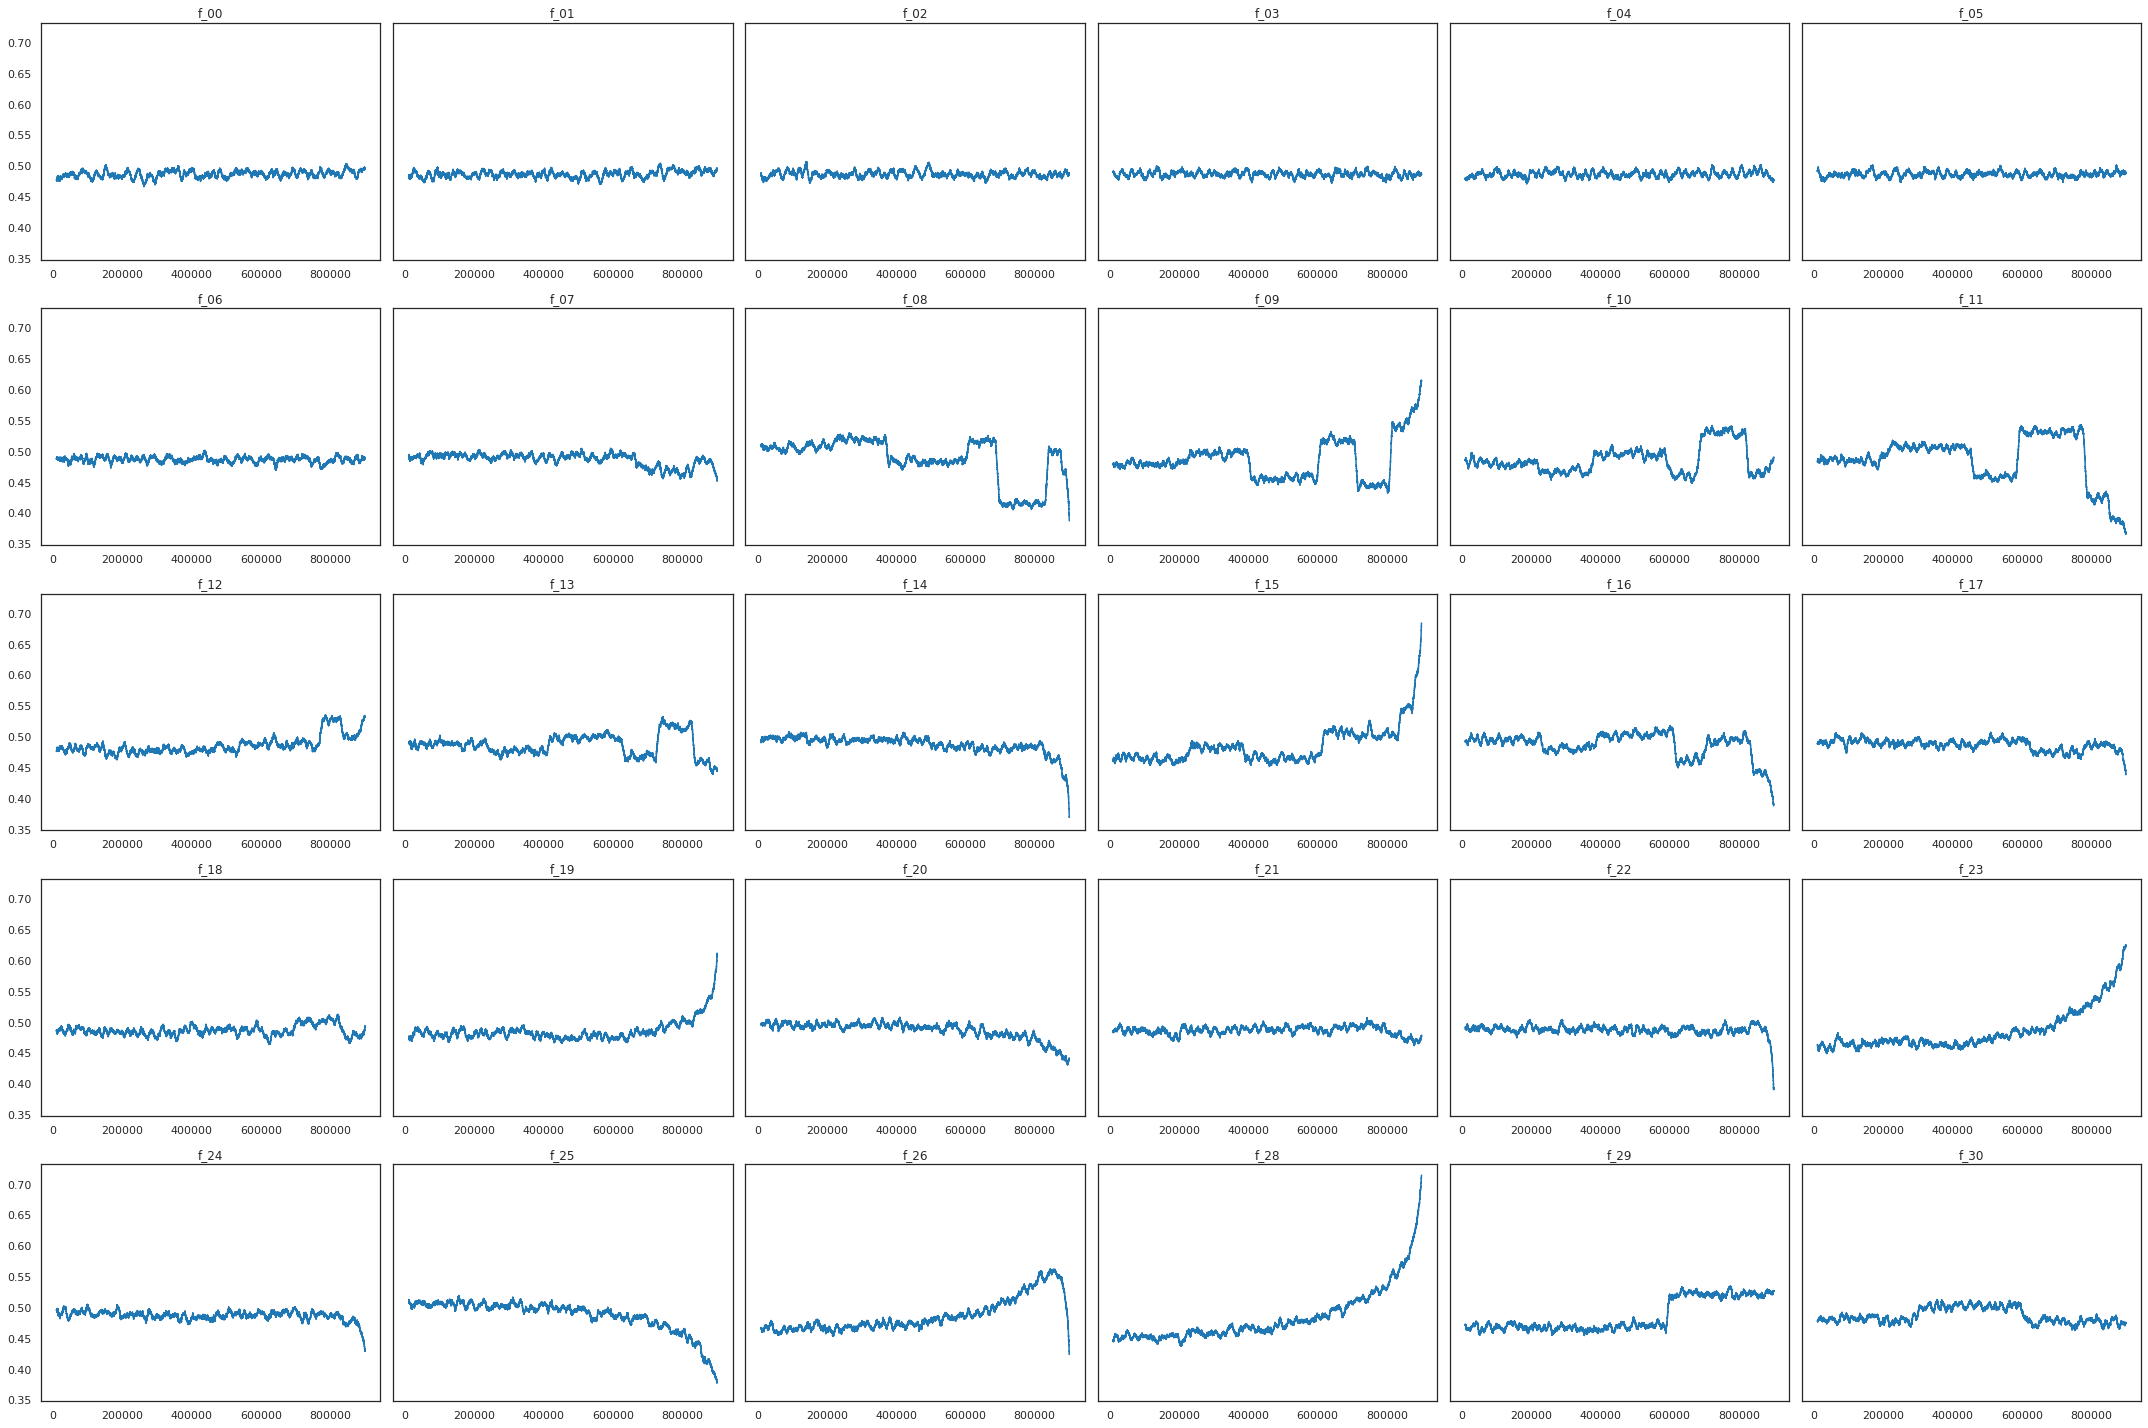

In [51]:
plt.subplots(5, 6, figsize=(30, 20), sharey=True)
for i in range(31):
    if i == 27:
        continue
    plt.subplot(5, 6, i + 1 if i < 27 else i)

    new_col = f"{features[i]}_diff_square"
    train[new_col] = (train[features[i]] - train[features[i]].mean()) ** 2

    t = train.sort_values(new_col).target
    t.reset_index(drop=True).rolling(10000).mean().plot()
    plt.title(features[i])
plt.tight_layout()

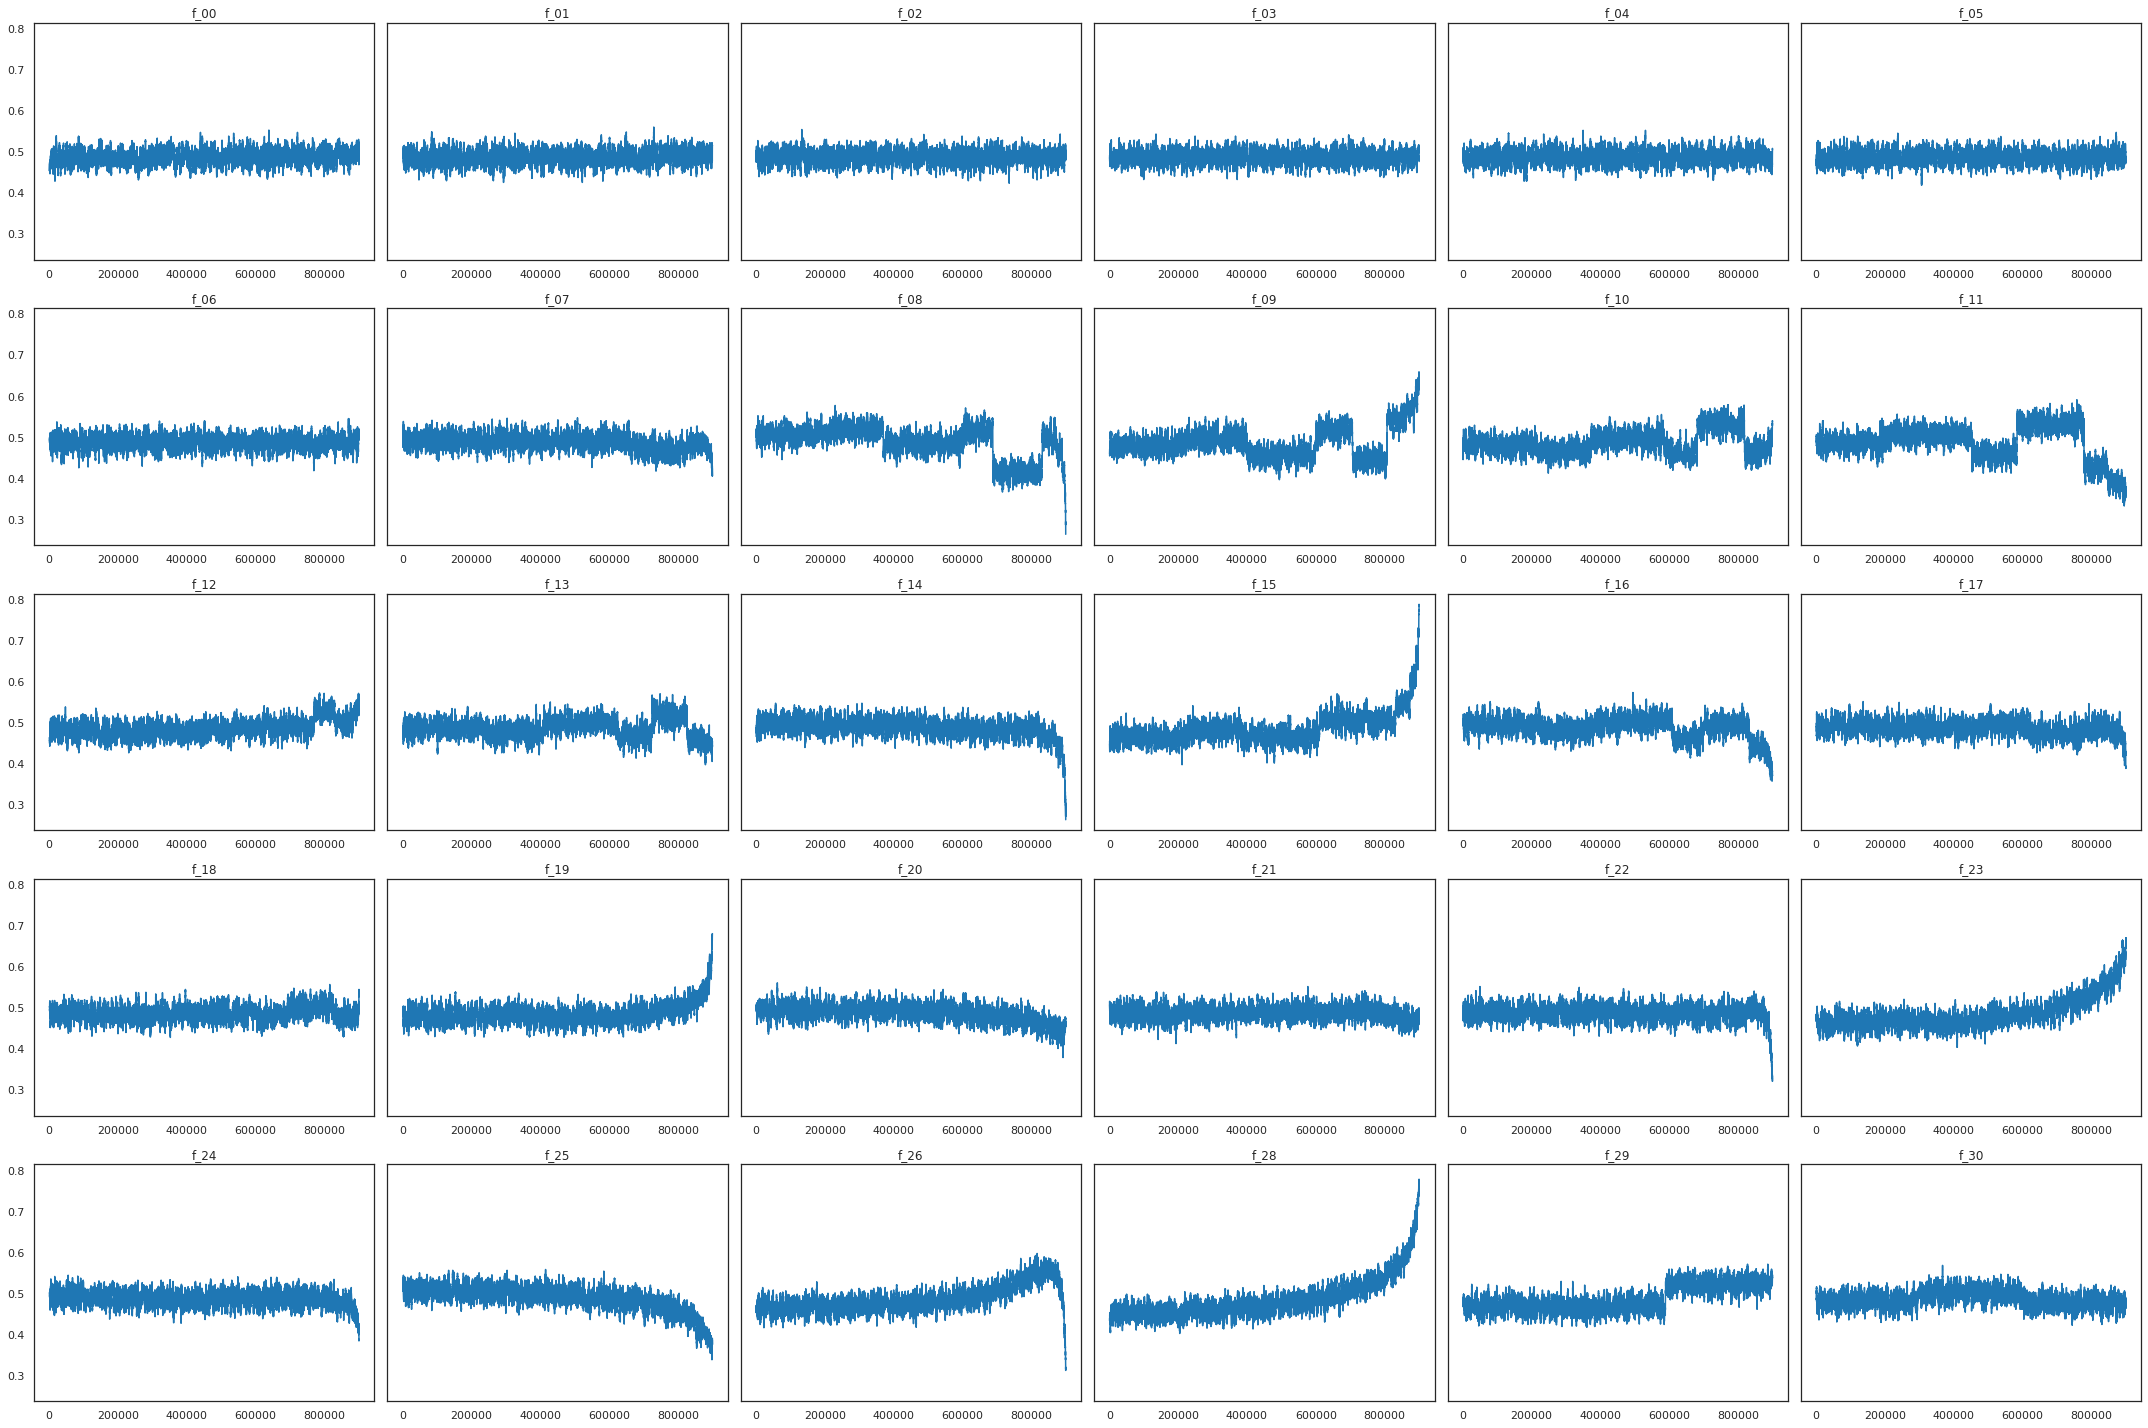

In [52]:
plt.subplots(5, 6, figsize=(30, 20), sharey=True)
for i in range(31):
    if i == 27:
        continue
    plt.subplot(5, 6, i + 1 if i < 27 else i)

    new_col = f"{features[i]}_diff_square"
    train[new_col] = (train[features[i]] - train[features[i]].mean()) ** 2

    t = train.sort_values(new_col).target
    t.reset_index(drop=True).rolling(1000).mean().plot()
    plt.title(features[i])
plt.tight_layout()

In [58]:
train["f_27_first"] = train["f_27"].str[:1]

In [59]:
train.groupby("f_27_first").target.mean()

f_27_first
A    0.536437
B    0.436270
Name: target, dtype: float64

In [10]:
for i in range(10):
    train["tmp"] = train["f_27"].str[i]
    print(
        train["tmp"]
        .value_counts()
        .reset_index()
        .set_index("index")
        .join(train.groupby("tmp").target.mean())
        .sort_values("target")
        .shape[0]
    )

2
14
2
15
14
2
15
20
15
15


* `f_27`: word
* `f_00 ~ f_06, f_19 ~ f_26, f_28`, 900_000
* `f_07 ~ f_18`, around 16
* `f_29, f_30`,  2, 3

In [87]:
t = train.nunique()
t[t != 900_000]

f_07                    16
f_08                    16
f_09                    15
f_10                    15
f_11                    14
f_12                    16
f_13                    13
f_14                    14
f_15                    15
f_16                    16
f_17                    14
f_18                    14
f_27                741354
f_29                     2
f_30                     3
target                   2
f_07_diff_square        16
f_08_diff_square        16
f_09_diff_square        15
f_10_diff_square        15
f_11_diff_square        14
f_12_diff_square        16
f_13_diff_square        13
f_14_diff_square        14
f_15_diff_square        15
f_16_diff_square        16
f_17_diff_square        14
f_18_diff_square        14
f_29_diff_square         2
f_30_diff_square         3
f_27_first               2
f_27_2                   0
dtype: int64

In [115]:
([f"f_{i:02d}" for i in range(7)] + [f"f_{i:02d}" for i in range(19, 27)] + ["f_28"])

['f_00',
 'f_01',
 'f_02',
 'f_03',
 'f_04',
 'f_05',
 'f_06',
 'f_19',
 'f_20',
 'f_21',
 'f_22',
 'f_23',
 'f_24',
 'f_25',
 'f_26',
 'f_28']

In [103]:
for i in range(7, 19):
    t = train[features[i]]
    # ((t - t.mean()) ** 2).nunique()
    print(features[i], t.sort_values().unique())

f_07 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
f_08 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16]
f_09 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
f_10 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
f_11 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
f_12 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16]
f_13 [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
f_14 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14]
f_15 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
f_16 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
f_17 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14]
f_18 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [129]:
t = train.drop(columns="f_29")
t = pd.get_dummies(t)
t.rename(columns={0: "f_29_0", 1: "f_29_1"}, inplace=False)

Error: Canceled future for execute_request message before replies were done

In [126]:
train.drop(columns="f_29")

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
899995,1,0
899996,1,0
899997,1,0
899998,0,1
